# Fiatlight: Brighten the Journey from Idea to Creation

*Expressive Code, Instant Applications*

Fiatlight **bridges the gap between code and UI**, allowing you to turn ideas into **fully functional applications in minutes**. It **automates UI generation** for functions and structured data, making prototyping and fine-tuning faster and easier.

> *For technical readers:*
>
> FiatLight provides automatic UI generation for functions and structured data, making it a powerful tool for rapid prototyping and application development.
>
>    * Instant Widgets: Edit and visualize any Python object with fine-grained control.
>    * Function Pipelines: Chain functions into visual and interactive workflows.
>    * Built-in Validation & Debugging: Enforce constraints, inspect data, and replay errors.
>    * State Persistence: Save and restore application state seamlessly.


_The name "Fiatlight" is inspired by "Fiat Lux", i.e. "Let there be light"._

_Fiatlight is designed for rapid prototyping, experimentation, and fine-tuning applications. It does not provide full design control over GUI._


# Key Features and examples

*Notes: this page intends to provide a high-level overview of Fiatlight's capabilities. For detailed tutorials, please refer to the [video tutorials](video_tutorials) and the [manual](manual). Also, the demos presented in this page are also available in the video below*

<a href="https://share.descript.com/view/tbvYBh3rpRF" target="_blank">
<img src="_static/images/video_fl_demo.jpg" width="300" /></a>


## Create a GUI for structured data

In the example below, the GUI definition was created automatically, from the data structure definition of a nested pydantic BaseModel (including the validation rules, in yellow).

In [2]:
from fiatlight.demos.tutorials.pydantic_gui import demo_basemodel_app
# demo_basemodel_app.main()

![img.png](_static/images/demo_basemodel_app.png)

> *For technical readers: See the [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/tutorials/pydantic_gui/demo_basemodel_app.py) for demo_basemodel_app.py*. The GUI was created automatically, from a nested Pydantic model, with custom validator.

## Create a GUI for any function

Simply call `fl.run` with a function or a list of functions, and Fiatlight will automatically generate a GUI for them.

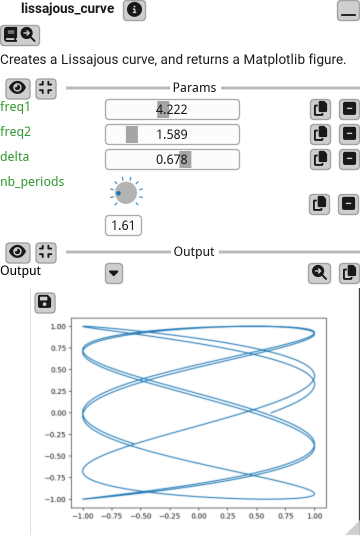

In [8]:
# Part 1: Standard Python code (no user interface)
# ------------------------------------------------
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


def lissajous_curve(freq1: float = 5.0, freq2: float = 4.0, delta: float = np.pi / 2, nb_periods: float = 1) -> plt.Figure:
    """Creates a Lissajous curve, and returns a Matplotlib figure."""
    t = np.linspace(0, 2 * np.pi * nb_periods, 10_000)
    x = np.sin(freq1 * t + delta)
    y = np.sin(freq2 * t)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    return fig


# Part 2: Add a GUI to the code in a few seconds
# -----------------------------------------------
import fiatlight as fl

# Options for widgets
fl.add_fiat_attributes(
    lissajous_curve,
    freq1__range=(0, 10), freq2__range=(0, 10), delta__range=(-np.pi, np.pi),
    nb_periods__range=(0.1, 10), nb_periods__edit_type="knob",
)
# Run the function interactively
fl.run(lissajous_curve, app_name="Interactive Lissajou Curve")

*See the application in action in the video below*

<video src="_static/videos/lissajou.mp4" controls="controls" width="30%" height="auto"></video>

## From Idea to App in 3 minutes

Create a full application in just 4 lines of Python by chaining pure Python functions into an interactive graph. This graph visually displays each function’s inputs and outputs, allowing for manual input adjustments.


*Example: The application below is a meme generator. It is a simple composition of an AI image generator, and a function that adds text onto an image*

  0%|          | 0/1 [00:00<?, ?it/s]

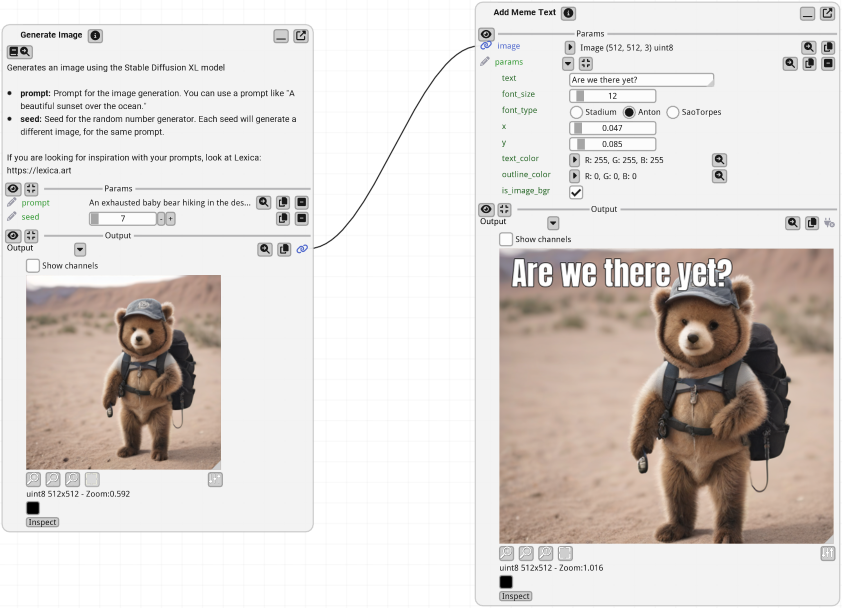

In [6]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_ai import invoke_sdxl_turbo
from fiatlight.fiat_kits.fiat_image.add_meme_text import add_meme_text

# Run the composition to create a simple app
fl.run([invoke_sdxl_turbo, add_meme_text], app_name="Old school meme generator")

This can be used as a full application:
  * All inputs are saved: prompt, and meme text, font, color, position of the text
  * All preferences are saved: window size, position, and layout of the nodes
  * The user can save and load different state of the application (i.e. different memes)


> *For technical readers: [`invoke_sdxl_turbo`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_ai/invoke_sdxl_turbo.py) provides a simple wrapper to SDXL, and [`add_meme_text`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/old_school_meme.py) is a Python function that adds colored text onto an image.*



## Domain-specific Kits:

`fiatlight.fiats_kits` is intended to provide a set of pre-built functions and widgets for various domains, such as:

- **Image analysis**: Sophisticated image analysis and manipulation widgets. See [fiat_image](fiat_image.ipynb).

- **Data Visualization**: Display interactive data plots and charts for real-time data analysis, using MatPlotlib or ImPlot. See [fiat_matplotlib](fiat_matplotlib.ipynb), and [fiat_implot](fiat_implot.ipynb) (for ImPlot)

- **Data Exploration**: Provide widgets for exploring dataframes. See [fiat_dataframe](fiat_dataframe.ipynb).

- **AI**: (Draft) Provide a widget for Prompt entry, and an interface to Stable Diffusion. See [fiat_ai](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_ai).


### Image analysis

*The example below shows an image which undergoes a pipeline for a dilated edge extraction. The image viewer can pan & zoom the images in sync, and display the pixel values*

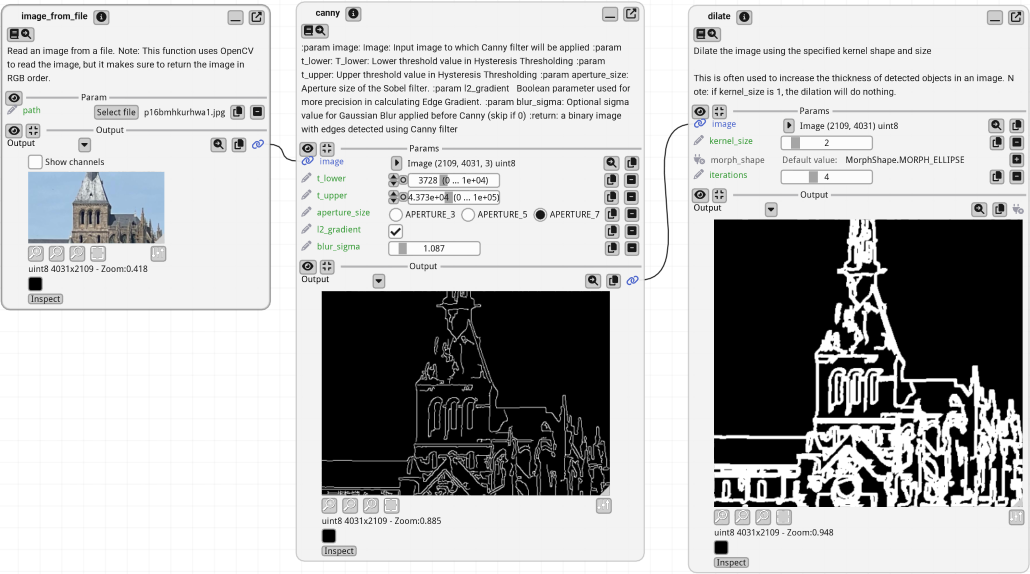

In [7]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import image_from_file
from fiatlight.demos.images.demo_canny import canny, dilate

fl.run([image_from_file, canny, dilate], app_name="demo_computer_vision")

>*For technical readers: [`image_from_file`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_image/image_to_from_file_gui.py) is a function that reads an image from a file, [`canny`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/opencv_wrappers.py) applies the Canny edge detection algorithm, and [`dilate`](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/opencv_wrappers.py) dilates the edges.*

### Data visualization with Matplotlib and ImPlot

*In the example below, we display figures using [ImPlot](https://github.com/epezent/implot) (left) and [Matplotlib](https://matplotlib.org/) (right). Each figure provides user-settable parameters (in a given range, with customizable widgets). The sine wave function is updated in real time.*

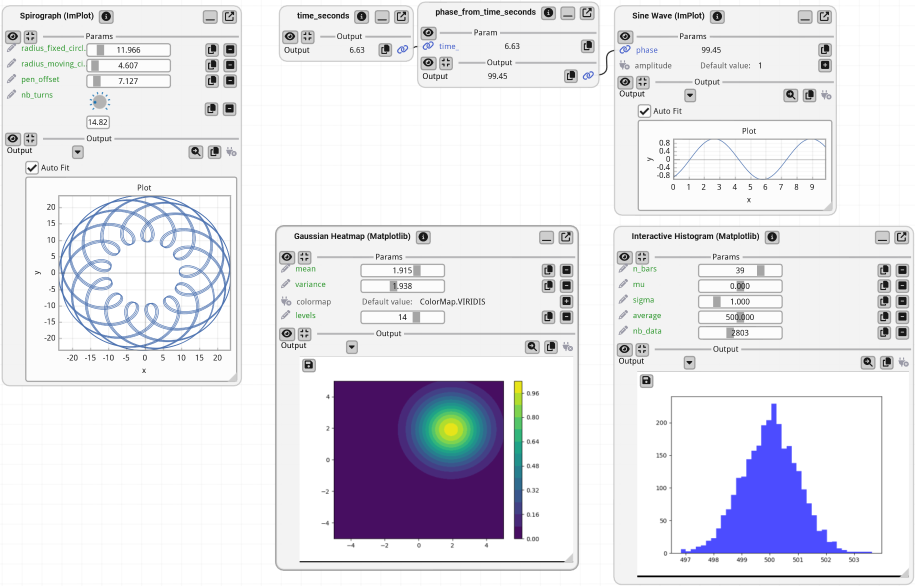

In [8]:
from fiatlight.demos.plots import demo_mix_implot_matplotib

demo_mix_implot_matplotib.main()

> *For technical readers:*
> * when a function returns a `matplotlib.figure.Figure`, its output will be displayed as a plot. See demo_matplotlib.py [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_matplotlib/demo_matplotlib.py).*
> * when a function returns a `fiat_implot.FloatMatrix_Dim1` or `fiat_implot.FloatMatrix_Dim2` (which are aliases for np.ndarray), its output will be displayed as a plot, using [ImPlot](https://github.com/epezent/implot). See demo_implot [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_implot/demo_implot.py).
> * [ImPlot](https://github.com/epezent/implot) is a plotting library for Dear ImGui. It is often faster than Matplotlib, and can be used in real-time applications. For a complete demo of ImPlot, click here: [ImPlot complete demo](https://traineq.org/implot_demo/src/implot_demo.html)*

### Data Exploration
*In the example below, we display a data frame from the famous titanic example with filtering.*

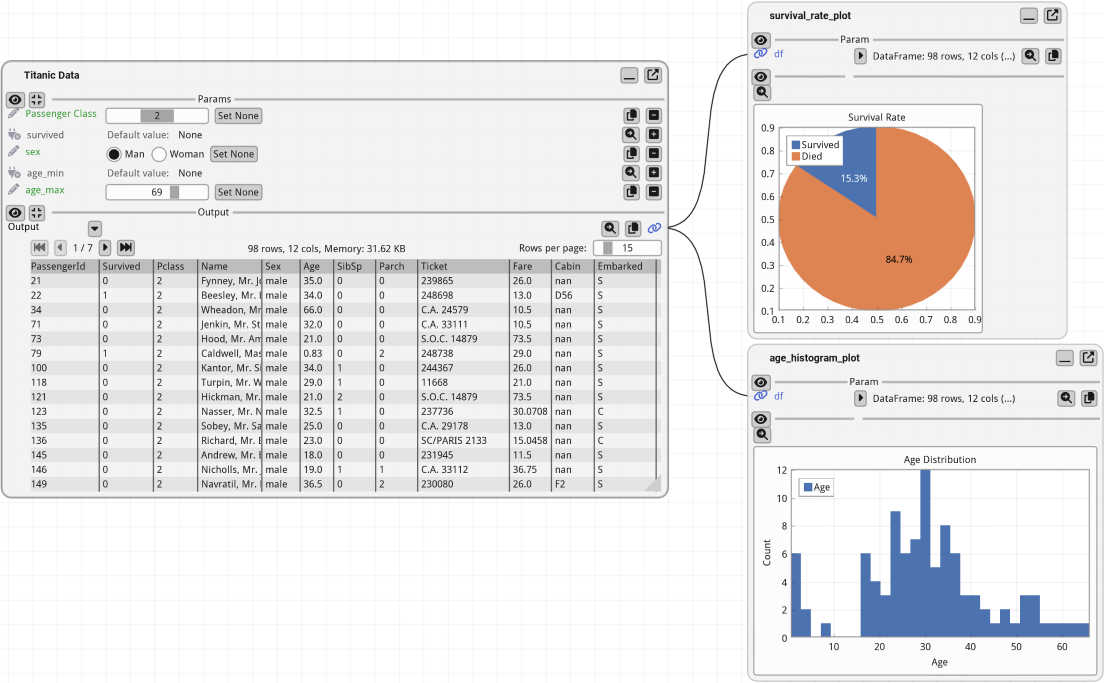

In [9]:
from fiatlight.fiat_kits.fiat_dataframe import dataframe_with_gui_demo_titanic
dataframe_with_gui_demo_titanic.main()

### AI - Image generation

*Example: the application below generates images using a stable diffusion model, and enables to add effects to it (color transformation, add colored edges).*

  0%|          | 0/1 [00:00<?, ?it/s]

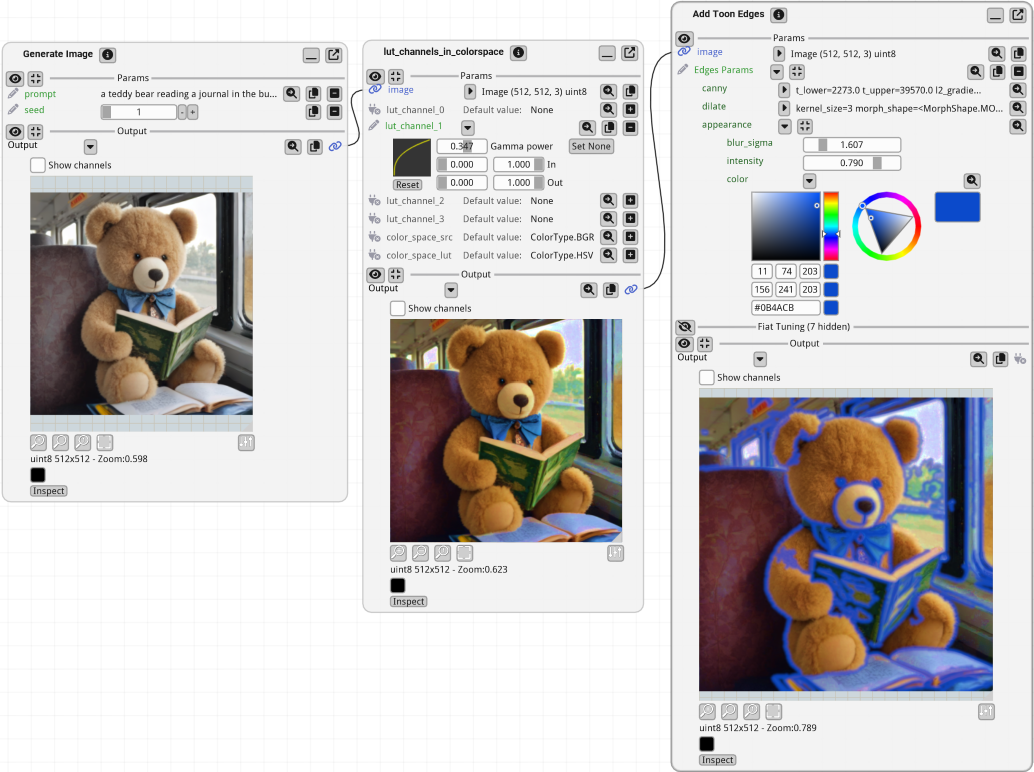

In [5]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_ai import invoke_sdxl_turbo
from fiatlight.fiat_kits.fiat_image import lut_channels_in_colorspace
from fiatlight.demos.images.toon_edges import add_toon_edges

fl.run([invoke_sdxl_turbo, lut_channels_in_colorspace, add_toon_edges], app_name="SDXL Edges")

>*For technical readers: `invoke_sdxl_turbo` uses HuggingFace's diffuser library to invoke stable diffusion. See its [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/fiat_ai/invoke_sdxl_turbo.py)*


## Visualize, Understand, Innovate


### Visualize the Pipeline flow

*Example: the application below looks for the most frequent words in a given text file (here with the text from "Hamlet"), by applying a pipeline of transformations. It is possible to inspect the input and outputs of each function.*

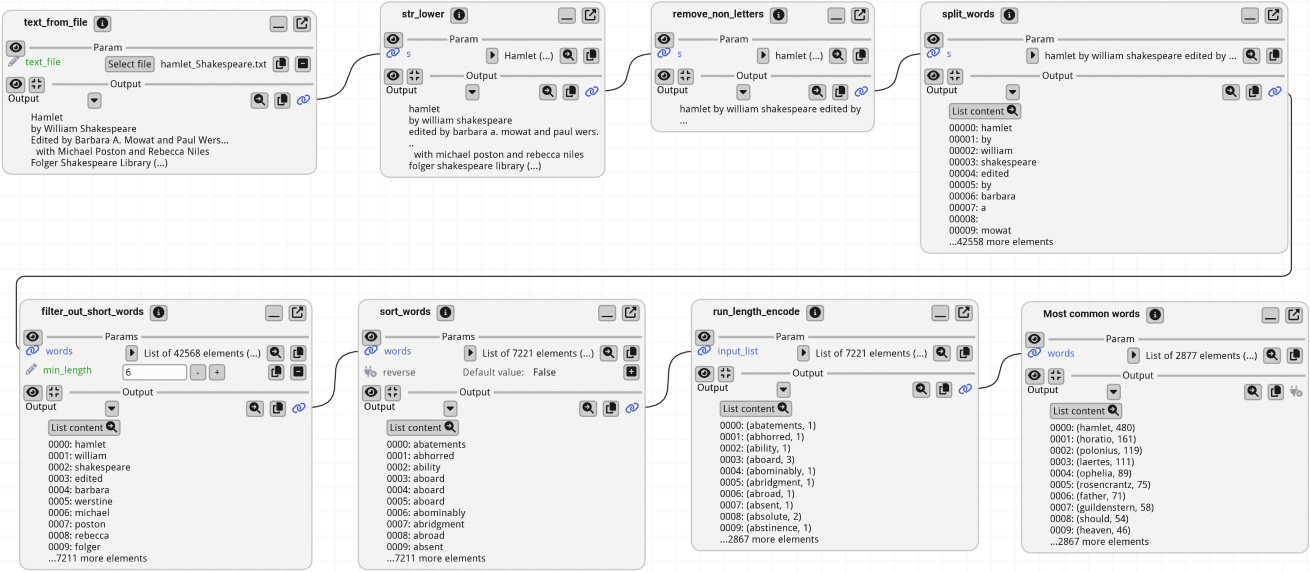

In [11]:
from fiatlight.demos.string import demo_word_count
demo_word_count.main()

> *For technical readers: demo_word_count will simply chain the following string functions:
>     `text_from_file, str_lower, split_words, filter_out_short_words,
>     sort_words, run_length_encode, sort_word_with_counts`.
> See its [source](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/string/demo_word_count.py)*

### Examine and understand function internals

fiatlight provides you with powerful tools to visually debug the intermediate states of your function.

*Example: the function add_toon_edges below is a complex function that adds a toon effect to an image. We can visualize the intermediate internal variables of the function (edges, dilated edges), even if they are not returned by the function.*

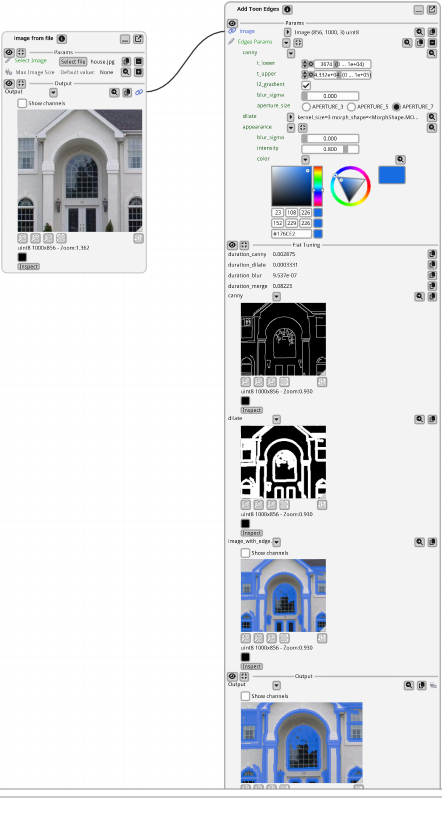

In [2]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import ImageU8_GRAY, ImageU8_3, image_source
from fiatlight.demos.images.toon_edges import add_toon_edges

fl.run([image_source, add_toon_edges], app_name="Toon Edges")

> *For technical readers: the function `add_toon_edges` has an attribute `fiat_tuning` that contains the internal variables that will be displayed. See [demos/images/toon_edges.py](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/toon_edges.py).*


### Replay and debug function errors

*Example: the following application raises an error. However, this error can be replayed, with **the exact same inputs** to facilitate the debugging*

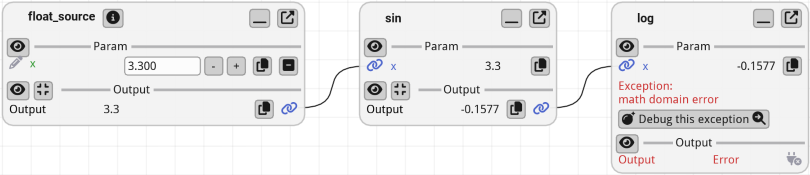

In [4]:
import fiatlight as fl
import math

def float_source(x: float) -> float:
    """A source where the user can specify an input value."""
    return x
def sin(x: float) -> float:
    return math.sin(x)
def log(x: float) -> float:
    return math.log(x)

fl.run([float_source, sin, log], app_name="Replay error")

> *For technical readers: the function `log` will raise an error when x is negative. Once you click on the "Debug this exception" button, you will be able to debug it:*

![debug break](images/debug_break.jpg)


## Full-fledged Applications

Besides being extremely powerful to generate function graphs, Fiatlight's powerful GUI capabilities can also help you generate sophisticated classic applications.

### Applications with advanced GUI

The example below shows an application which:
- reuses the sophisticated GUI provided by Fiatlight in a standard application
- automatically, Save and reloads its state, and GUI presentation options
- provides dockable windows, and a top toolbar

In [5]:
from fiatlight.demos.full_fledged_app import demo_image_processors_app
# demo_image_processors_app.main()

![img.png](_static/images/demo_image_processors_app.png)

> * For technical readers: See the [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/full_fledged_app/demo_image_processors_app.py) for demo_image_processors_app.py*.


## Custom Graph Creation

Create custom graphs with a drag-and-drop interface, similar to Scratch, enabling a visual approach to building workflows.

*Example: in the image below, its is possible to add and link function nodes:*

In [2]:
from fiatlight.demos.custom_graph import demo_custom_graph
# demo_custom_graph.main()

![custom graph](images/custom_graph.jpg)

> *For technical readers: See the [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/custom_graph/demo_custom_graph.py) for custom_graph.py*


## Custom Widgets

Define custom ranges for data types, create custom widgets, and leverage special function attributes like async, live, and ranges for enhanced functionality and performance.

*Example: display and play a sound wave with a custom widget*

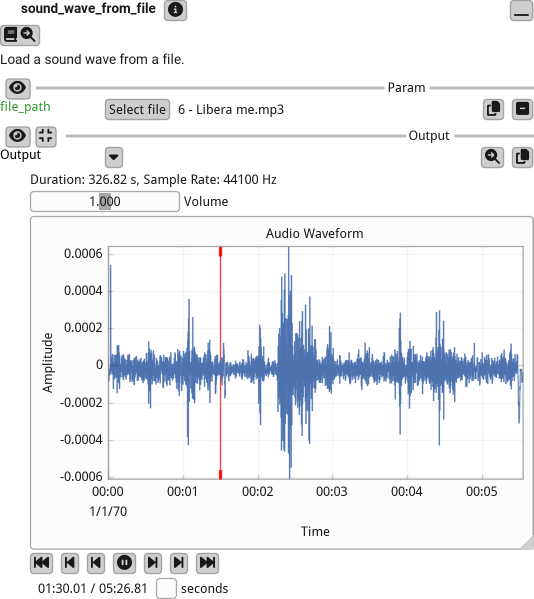

In [4]:
import fiatlight as fl
from fiatlight.fiat_kits.experimental.fiat_audio_simple import sound_wave_from_file
fl.run(sound_wave_from_file, app_name="Sound Wave Player")

> *For technical readers: `sound_wave_from_file` is a function that returns a sound wave from a file, and the widget is a custom widget that displays the sound wave and allows you to play it. See its [source code](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_kits/experimental/fiat_audio_simple/sound_wave_player_gui.py)*


---------------------------------------------------------------------------------------------------

# Use Cases

Fiatlight is **best suited for**:

- **Rapid Prototyping** – Quickly transform ideas into interactive applications with minimal effort.
- **Fine-Tuning & Debugging** – Inspect intermediate states, visualize function outputs, and replay errors.
- **Education** – Teach programming, data science, and algorithm design with interactive tools.
- **Data Exploration** – Analyze, filter, and visualize complex datasets in real-time.
- **AI & Machine Learning** – Prototype AI models, fine-tune hyperparameters, and visualize results dynamically.
- **Application Development** – Prototypes built with Fiatlight can be **seamlessly transitioned into full applications** using **Dear ImGui**. Since Dear ImGui’s API is nearly identical in Python and C++, porting to C++ is straightforward.

How does Fiatlight compare to other tools? See the [full comparison](comparisons).

# Full pdf version of this book

View or download the [full pdf](https://pthom.github.io/fiatlight_doc/flgt.pdf) for this manual.

You may feed it into a LLM such as ChatGPT, so that it can help you when using Fiatlight.